## Task 1 and 2

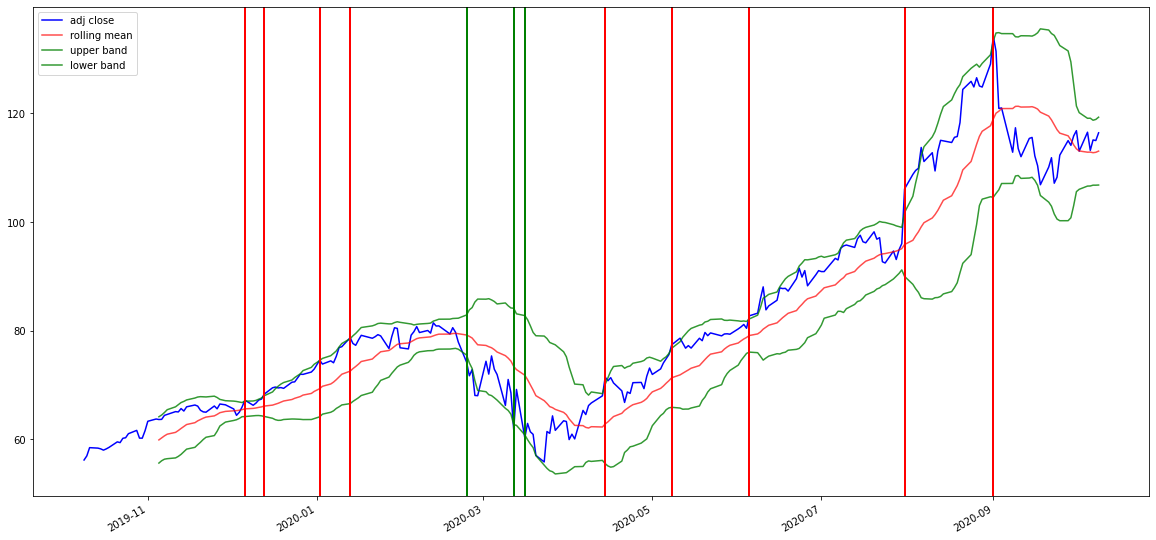

In [260]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

aapl = pd.read_csv('./data/AAPL.csv')
df = aapl[['Date', 'Adj Close']]
df.columns = [df.columns[0].lower(), df.columns[1].lower()]
df.date = pd.to_datetime(df.date)

bb_window = 20

df['rm'] = df['adj close'].rolling(bb_window).mean()
# upper  band
df['ub'] = df.rm + 2*df['adj close'].rolling(bb_window).std()
# lower band
df['lb'] = df.rm - 2*df['adj close'].rolling(bb_window).std()

# True if adj close < ub, false otherwise
b_sell = np.sign(df['adj close'] - df.ub).diff().ge(1) 
# first 20 elements are nan, need to set them manually to False
b_sell[:20]=False 
# find indexes of True 
b_sell = np.array(np.where(b_sell == True)).squeeze()

b_buy = np.sign(df.lb - df['adj close'] ).diff().ge(1) 
b_buy[:20]=False 
b_buy = np.array(np.where(b_buy == True)).squeeze() 

fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(df.date, df['adj close'], color = 'b')
ax.plot(df.date, df.rm, color = 'r', alpha = 0.7)
ax.plot(df.date, df.ub, color = 'g', alpha = 0.8)
ax.plot(df.date, df.lb, color = 'g', alpha = 0.8)
ax.legend(('adj close', 'rolling mean', 'upper band', 'lower band'))
for el in df.loc[b_sell].date: 
    ax.axvline(el, linewidth=2, color='r')
for el in  df.loc[b_buy].date: 
    ax.axvline(el, linewidth=2, color='g')

plt.gcf().autofmt_xdate()
plt.show()